In [61]:
library(readr)
library(dplyr)
# install.packages("lessR")
library(lessR)
library(plotrix)
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
setwd("D://Datasets")
df <- read.table(file="dns.txt", sep=",", header=F)

In [3]:
dim(df)
str(df)

[1] 40821591        3

'data.frame':	40821591 obs. of  3 variables:
 $ V1: int  2 2 6 15 18 31 35 38 42 42 ...
 $ V2: Factor w/ 15013 levels "C1","C10","C100",..: 11772 12413 1183 10952 8654 3825 12349 10952 8610 8610 ...
 $ V3: Factor w/ 13776 levels "C1","C10","C1000",..: 10895 3889 10408 7175 10895 6305 11032 7175 378 6305 ...


In [5]:
colnames(df) <- c("Time", "Source", "Dest")

In [6]:
head(df, 10)

Time,Source,Dest
2,C4653,C5030
2,C5782,C16712
6,C1191,C419
15,C3380,C22841
18,C2436,C5030
31,C161,C2109
35,C5642,C528
38,C3380,C22841
42,C2428,C1065
42,C2428,C2109


In [118]:
i<- 1
t<- table(df$Source)
T<- length(t)/500
len<- vector()
med <- vector()

while(length(t)>T) {
    len[i]<- length(t)
    m<- mean(t)
    med[i] <- m
    i<- 1+i
    t<- t[t>m]
    }

len <- c(len, 0)
med <- round(med)

In [119]:
len
med
t

[1] 15013  5109   640    71     0

[1]   2719   5293  17777 102330


  C1193  C17490  C17640   C1823   C2091  C22235   C3380    C395    C561   C5741 
 149849  162708  117486  391719  140060  144637  163298  130280  138250  350885 
   C585    C639    C743   C8882 
1624999  113462 1149807  137691 

In [120]:
percentile <- vector(len=length(len)-1)
for(i in 1:length(len)-1) {
    percentile[i] <- len[i]-len[i+1]
}

In [121]:
percentile
perc <- c(percentile, length(t))
perc

[1] 9904 4469  569   71

[1] 9904 4469  569   71   14

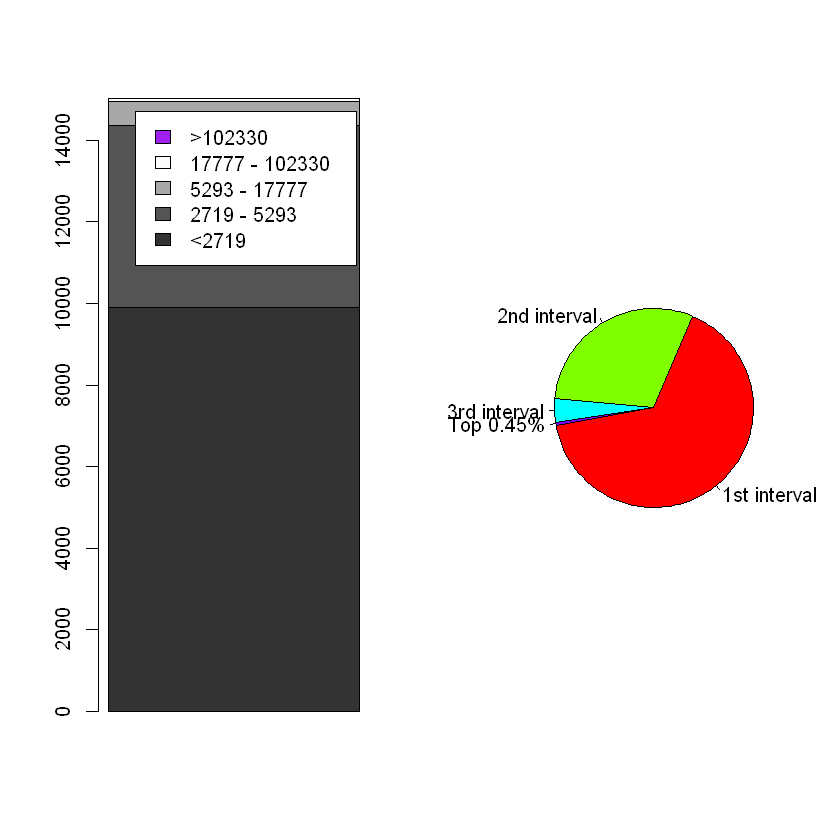

In [122]:
op <- par(mfrow=c(1,2))
barplot(as.matrix(perc),
       legend.text=c(paste0("<", med[1]), paste0(med[1], " - ", med[2]), paste0(med[2], " - ", med[3]), paste0(med[3], " - ", med[4]), paste0(">", med[4])),
       col=c("grey20", "grey33", "grey66", "grey99", "purple")) 
pie(percentile, 
labels=c("1st interval", "2nd interval", "3rd interval", "Top 0.45%"), 
col = rainbow(4), init.angle=190)
par(op)